In [1]:
from ramlab.molecules import NO
import matplotlib.pyplot as plt
import wedme
import numpy as np
from ramlab.simulate.simulation import simulate
wedme.apply.paper_fw_dh()

M = NO()

# Select the 5000 most intense transitions
transitions = M.get_all_transitions()
transitions = transitions.sortby("intensity", ascending=False)

# Calculate the intensity of the transitions for T=860 K
I_stick = M.get_intensity(transitions, T=860)
dnu_stick = transitions.vacuum_wavenumber

# Simulate the spectrum with Gaussian and Lorentzian broadening
# dnu_sim = np.linspace(dnu_stick.min(), dnu_stick.max(), 500)
# I_sim = simulate(dnu_sim, dnu_stick, I_stick, 1, 0, N_bin=10)

Loading csv file: 308000rows [00:01, 192532.00rows/s]


Rejected 1 lines with a length not equal to 160.


In [19]:
transitions.linelist.to_pickle("NO_linelist.pkl")

import pickle
with open("NO_linelist.pkl", "rb") as f:
    transitions = pickle.load(f)
    print(transitions)

        molecule_no  isotope_no  vacuum_wavenumber      intensity  \
192842            8           1        1900.081594   2.322000e-20   
192832            8           1        1900.070593   2.322000e-20   
193138            8           1        1903.122819   2.308000e-20   
193145            8           1        1903.133598   2.307000e-20   
192539            8           1        1896.983859   2.265000e-20   
...             ...         ...                ...            ...   
4558              8           1          20.423474  6.364000e-138   
3385              8           1          17.507955  2.229000e-138   
4606              8           1          20.516854  2.194000e-138   
3501              8           1          17.967388  1.799000e-138   
4522              8           1          20.363571  1.721000e-138   

        einstein_A_coefficient     lower_E upper_quanta_global  \
192842            5.958000e+00     80.3003            X1/2   1   
192832            5.955000e+00     80.2

In [28]:
print(transitions.upper_F)

[8.5 8.5 9.5 ... nan nan nan]


In [4]:
transitions.dv = transitions.upper_v1 - transitions.lower_v1

In [5]:
transitions.dJ = transitions.upper_F - transitions.lower_F

In [6]:
print(transitions.dJ)

[ 1.  1.  1. ... nan nan nan]


In [7]:
transitions_rot = transitions[transitions.dv == 1]
print(transitions_rot)
transitions_dJ = transitions_rot[transitions_rot.dJ == 0]
print(transitions_dJ)
I_stick = M.get_intensity(transitions_dJ, T=300)
dnu_stick = transitions_dJ.vacuum_wavenumber

Transitions[2989504](molecule_no, isotope_no, vacuum_wavenumber, intensity, einstein_A_coefficient, lower_E, upper_quanta_global, lower_quanta_global, upper_quanta_local, lower_quanta_local, upper_degeneracy, lower_degeneracy, upper_quanta, upper_X, upper_Omega, upper_v1, upper_multiplex, upper_Br, upper_J, upper_Sym, upper_F, lower_X, lower_Omega, lower_v1, lower_multiplex, lower_Br, lower_J, lower_Sym, lower_F, crosssection, dv, dJ)
Transitions[108544](molecule_no, isotope_no, vacuum_wavenumber, intensity, einstein_A_coefficient, lower_E, upper_quanta_global, lower_quanta_global, upper_quanta_local, lower_quanta_local, upper_degeneracy, lower_degeneracy, upper_quanta, upper_X, upper_Omega, upper_v1, upper_multiplex, upper_Br, upper_J, upper_Sym, upper_F, lower_X, lower_Omega, lower_v1, lower_multiplex, lower_Br, lower_J, lower_Sym, lower_F, crosssection, dv, dJ)


In [8]:
np.unique(transitions_dJ.lower_Omega)

array(['1/2', '3/2'], dtype=object)

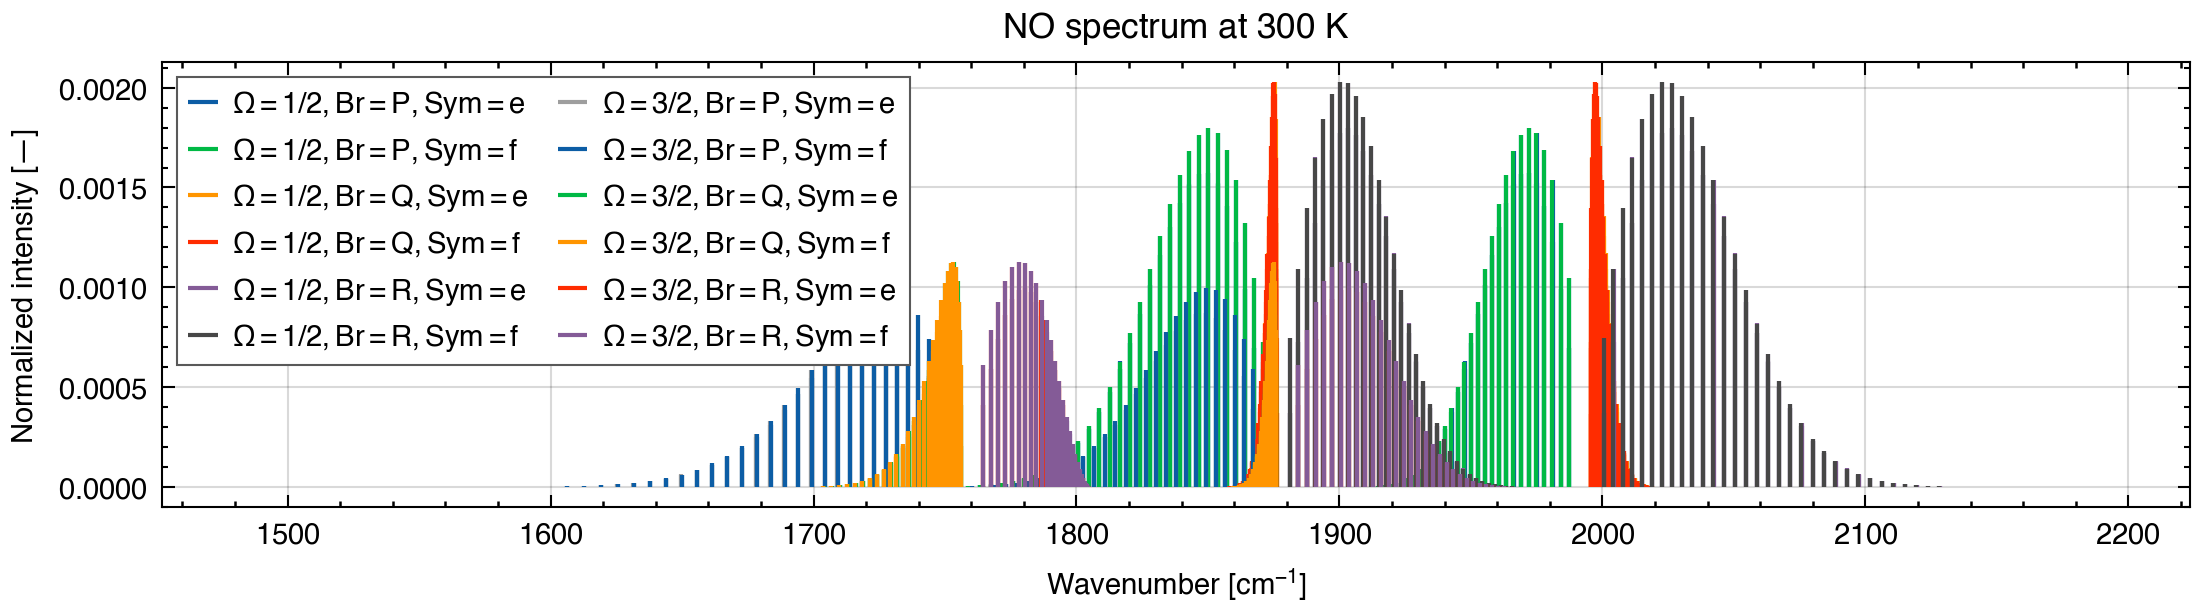

In [15]:
import wedme

plotcycler = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot the results
colorindex = 0
wedme.figure.paper_fw_dh()
for omega in np.unique(transitions_dJ.lower_Omega):
    mask1 = transitions_dJ.lower_Omega == omega
    for br in np.unique(transitions_dJ.lower_Br[mask1]):
        mask2 = mask1 & (transitions_dJ.lower_Br == br)
        for sym in np.unique(transitions_dJ.lower_Sym[mask2]):
            mask3 = mask2 & (transitions_dJ.lower_Sym == sym)
            plt.vlines(dnu_stick[mask3], 0, I_stick[mask3] , color=plotcycler[colorindex % len(plotcycler)], label=fr"$\Omega={omega}, Br={br}, Sym={sym}$")
            # plt.vlines(dnu_stick[mask3], 0, transitions_dJ.lower_degeneracy[mask3] , color=plotcycler[colorindex % len(plotcycler)], label=fr"$\Omega={omega}, Br={br}, Sym={sym}$")
        # plt.vlines(dnu_stick[mask2], 0, I_stick[mask2] / np.nanmax(I_stick[mask2]), color=plotcycler[colorindex], alpha=0.5, label=fr"Stick spectrum $\Omega={omega}, Br={br}$")
            colorindex += 1
# plt.plot(dnu_sim, I_sim / np.nanmax(I_sim), color="r", label="Simulated spectrum")
# plt.xlim(1)
l1 = plt.legend(ncols=2, loc="upper left")

plt.xlabel(r"Wavenumber [$\mathrm{cm^{-1}}$]")
plt.ylabel(r"Normalized intensity [$\mathrm{\emdash}$]")
plt.title(fr"$\mathregular{{{M.molecule_formula}}}$ spectrum at 300 K")
# plt.subplots_adjust(right=0.7)
plt.show()